# EDA OF Comment Data

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/FinalMaster/Combined_Comments.csv')

## Number of Comments

In [6]:
print("There are {} comments total".format(df.shape[0]))

There are 2018028 comments total


## Count of Comments by Thread

In [7]:
df.columns

Index(['comment_id', 'author', 'author_flair', 'score', 'comment_name',
       'comment_fullname', 'comment_is_root', 'comment_parent',
       'comment_created', 'comment_created_utc',
       'comment_created_utc_datetime', 'comment_created_utc_date',
       'comment_created_utc_time', 'comment_depth', 'comment_body',
       'submission_id', 'submission_title', 'submission_created_utc'],
      dtype='object')

In [18]:
df.groupby('submission_title').size().reset_index(name='counts').sort_values('counts', ascending=False)[:15]

,submission_title,counts
133,Game Thread: Jacksonville Jaguars (12-6) at Ne...,66406
132,Game Thread: Jacksonville Jaguars (11-6) at Pi...,52445
297,Super Bowl LII Game Thread: Philadelphia Eagle...,51054
296,Super Bowl LII Game Thread: Philadelphia Eagle...,42329
139,Game Thread: Kansas City Chiefs (0-0) at New E...,42054
276,Game Thread: Tennessee Titans (10-7) at New En...,40467
181,Game Thread: Minnesota Vikings (14-3) at Phila...,39742
285,Game Thread: Tennessee Titans (9-7) at Kansas ...,35894
10,Game Thread: Atlanta Falcons (11-6) at Philade...,33105
49,Game Thread: Chicago Bears (1-2) at Green Bay ...,32602


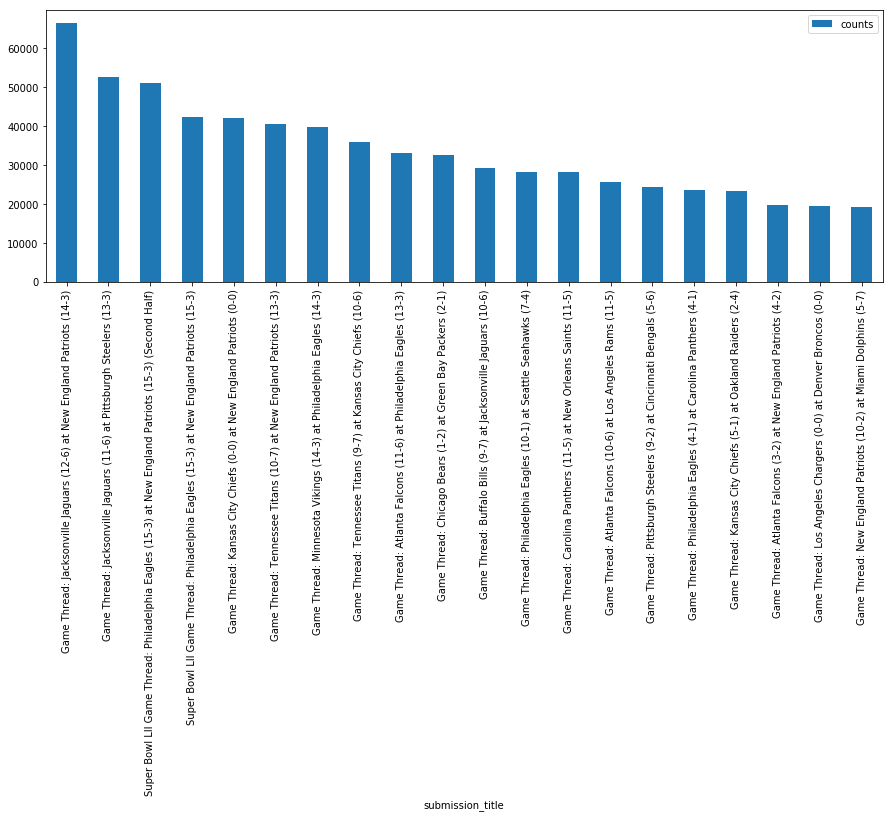

In [25]:
df.groupby('submission_title').size().reset_index(name='counts') \
    .sort_values('counts', ascending=False)[:20] \
    .plot(x='submission_title', kind='bar', figsize=(15,5))

## Count Comments by Flair

In [28]:
df.groupby('author_flair').size().reset_index(name='counts').sort_values('counts', ascending=False)

,author_flair,counts
32,Patriots,177996
16,Eagles,154526
50,Vikings,109998
43,Seahawks,105987
29,Packers,99349
14,Cowboys,85743
44,Steelers,83164
18,Falcons,77192
30,Panthers,65662
24,Lions,52810


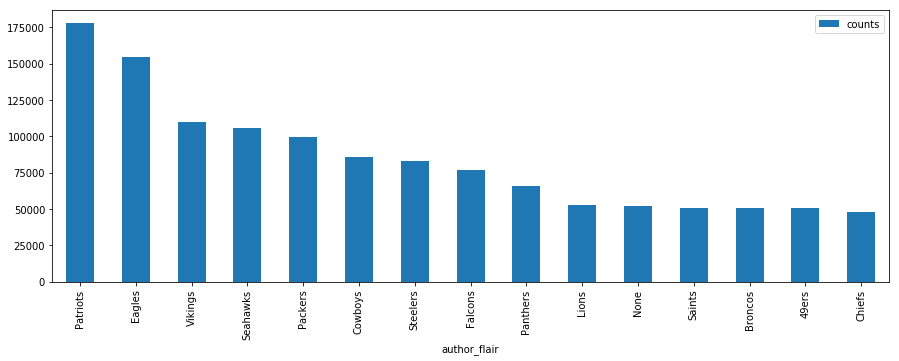

In [32]:
df.groupby('author_flair').size().reset_index(name='counts').sort_values('counts', ascending=False)[:15] \
    .plot(x='author_flair', kind='bar', figsize=(15,5))

## Top Posters

In [33]:
df.groupby('author').size().reset_index(name='counts').sort_values('counts', ascending=False)[:20]

,author,counts
25515,None,52315
72718,viikatemies,5963
50886,fieryscribe,3747
38105,UmpireAJS,3092
36122,TheRepenstein,3089
47097,couchjitsu,3052
33757,Stingberg,2996
36119,TheRedSpeedster,2760
24460,MusicNerds,2696
20731,LacesOutLocke,2676


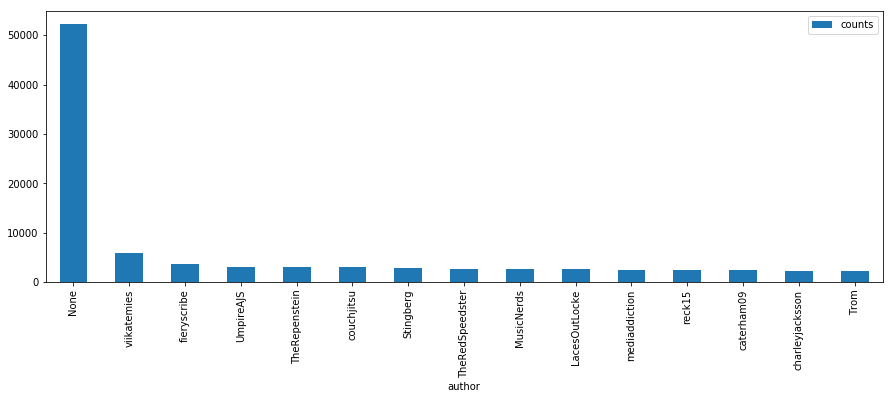

In [34]:
df.groupby('author').size().reset_index(name='counts').sort_values('counts', ascending=False)[:15] \
    .plot(x='author', kind='bar', figsize=(15,5))

## Post Score By Flair

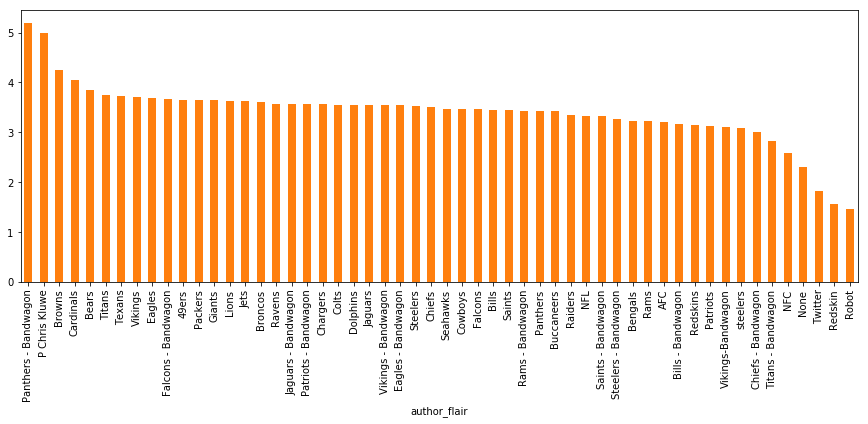

In [55]:
df.groupby('author_flair')['score'].agg(np.mean).sort_values(ascending=False).plot(x='author_flair', kind='bar', figsize=(15,5), color='C1')

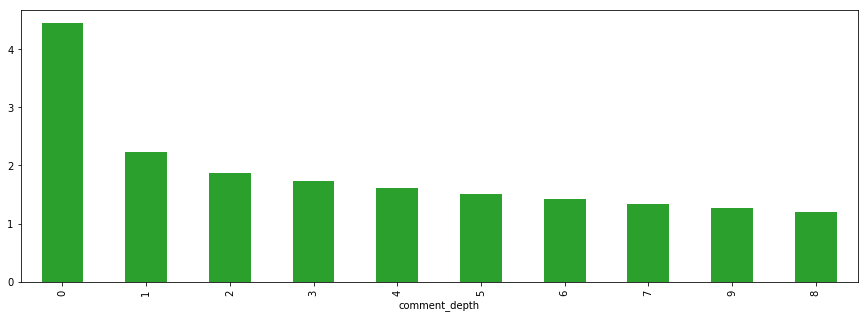

In [56]:
df.groupby('comment_depth')['score'].agg(np.mean).sort_values(ascending=False).plot(x='author_flair', kind='bar', figsize=(15,5), color='C2')

# Game Threads Average Ratings

In [75]:
df.groupby('submission_title').agg(np.mean).sort_values('score').head()

,score,comment_is_root,comment_created,comment_created_utc,comment_depth,submission_created_utc
submission_title,,,,,,
Game Thread: Los Angeles Chargers (1-2) at San Francisco 49ers (1-2),2.008475,0.584746,1.504263e+09,1.504234e+09,0.661017,1.504229e+09
Game Thread: Atlanta Falcons (3-3) at New York Jets (3-4),2.220232,0.586407,1.509331e+09,1.509302e+09,0.672813,1.509295e+09
Game Thread: Arizona Cardinals (3-4) at San Francisco 49ers (0-8),2.386111,0.611111,1.509951e+09,1.509922e+09,0.590278,1.509914e+09
Game Thread: Tampa Bay Buccaneers (2-3) at Buffalo Bills (3-2),2.395892,0.580766,1.508727e+09,1.508698e+09,0.633520,1.508690e+09
Game Thread: Miami Dolphins (2-2) at Atlanta Falcons (3-1),2.478611,0.594663,1.508122e+09,1.508094e+09,0.624312,1.508085e+09


## Highest and Lowest Voted Comment

In [97]:
for i, d in df.sort_values('score')[:20].iterrows():
    print('-----------------------------------')
    print(d['submission_title'])
    print("SCORE: {}".format(d['score']))
    print(d['comment_body'])
    print("Flair {}".format(d['author_flair']))

-----------------------------------
Game Thread: Miami Dolphins (4-2) at Baltimore Ravens (3-4)
SCORE: -190
[removed]
Flair None
-----------------------------------
Super Bowl LII Game Thread: Philadelphia Eagles (15-3) at New England Patriots (15-3) (Second Half)
SCORE: -173
[removed]
Flair None
-----------------------------------
Game Thread: Kansas City Chiefs (0-0) at New England Patriots (0-0)
SCORE: -162
S/O to all the people out there that still think the Chiefs can win this game
Flair Patriots
-----------------------------------
Game Thread: Carolina Panthers (11-5) at New Orleans Saints (11-5)
SCORE: -160
[removed]
Flair None
-----------------------------------
Game Thread: Jacksonville Jaguars (12-6) at New England Patriots (14-3)
SCORE: -127
[removed]
Flair None
-----------------------------------
Game Thread: Kansas City Chiefs (0-0) at New England Patriots (0-0)
SCORE: -127
Chiefs are good team but really a non-threat. Even though the game is close you never get the sense 

In [96]:
for i, d in df.sort_values('score', ascending=False)[:20].iterrows():
    print('-----------------------------------')
    print('-----------***********-------------')
    print('-----------------------------------')
    print(d['submission_title'])
    print("SCORE: {}".format(d['score']))
    print("Author: {}".format(d['author']))
    print("Flair: {}".format(d['author_flair']))
    print('-----------------------------------')
    print(d['comment_body'])
    print('')

-----------------------------------
-----------***********-------------
-----------------------------------
Super Bowl 51 Post Game Thread: New England Patriots (14-2) at Atlanta Falcons (11-5)
SCORE: 6212
Author: AmpII
Flair: 49ers
-----------------------------------
I'm not mad that the Patriots came back down 28-3 to win.  

I'm mad that I fucking *expected* the Patriots to come back down 28-3 to win.

-----------------------------------
-----------***********-------------
-----------------------------------
Super Bowl LII Game Thread: Philadelphia Eagles (15-3) at New England Patriots (15-3)
SCORE: 4177
Author: CALAMITYFOX
Flair: Lions
-----------------------------------
**Sorry for English I am from Africa, I just started watching your National American Football this year and I like very much,** The one thing I do not like is my friends and me not have very good knowledge how National American Football rules are. Things happen that are very confusing and we would like to know rule